Importing libraries:

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. You will be using this dataset for the rest of the assignment.

**Do not edit this cell.**

In [ ]:
np.random.seed(0)
'''
Setting a random seed allows you to generate reproducible results.
If anyone else runs this code, they'll get the same random sample (corresponding to seed "0").
'''

N = 2000

'''
`np.random.randn()` return a sample (or samples) from the “standard normal” distribution.
`np.array([a,b])` just adds `a` and `b` to first and second column respectively, see output.
'''
data1 = np.random.randn(N//3,2) + np.array([2,2])
data2 = np.random.randn(N//3,2) + np.array([-3,-3])
data3 = np.random.randn(N//3,2) + np.array([-5,3])
X = np.concatenate((data1, data2, data3))


In [ ]:
data1

array([[3.76405235, 2.40015721],
       [2.97873798, 4.2408932 ],
       [3.86755799, 1.02272212],
       ...,
       [3.30866875, 1.97420144],
       [3.14526217, 2.34649444],
       [2.77416061, 1.22554103]])

In [ ]:
data1 - np.array([2,2]) #This is np.random.randn(N//3,2)

array([[ 1.76405235,  0.40015721],
       [ 0.97873798,  2.2408932 ],
       [ 1.86755799, -0.97727788],
       ...,
       [ 1.30866875, -0.02579856],
       [ 1.14526217,  0.34649444],
       [ 0.77416061, -0.77445897]])

In [ ]:
X

array([[ 3.76405235,  2.40015721],
       [ 2.97873798,  4.2408932 ],
       [ 3.86755799,  1.02272212],
       ...,
       [-6.46836696,  3.5764787 ],
       [-4.93469439,  2.2264872 ],
       [-4.60505181,  2.49611011]])

## Problem 1
How many samples are there in the dataset?



In [ ]:
X.shape[0] #X.shape return a tuple (n,d), we need first component `n`

1998

## Problem 2

How many features are there in the dataset?


In [ ]:
X.shape[1]

2

## Problem 3
Plot the dataset using matplotlib.



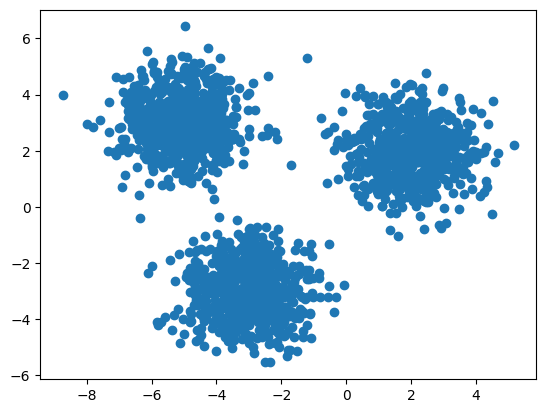

In [ ]:
# Each row of X is a vector (x,y)
# We just need to plot these x-components and corresponding y-components
# To select all x-components by slicing, use X[:,0]
# `:` selects all rows (i.e. vectors), `0` selects first column
# Similarly, select all rows and second column using X[:,1]

plt.scatter(X[:,0],X[:,1])

# `plt.scatter(X,y)` requires an array of x-components, `X`, and corresponding y-components, `y`

## Instruction

Assume k = 3. Take the data points with indices 200, 800, and 1200 in $X$ to be the initial cluster centers.


So the cluster centers are: $X[200]$, $X[800]$, and $X[1200]$.

In [ ]:
k = 3

cluster_centers = np.array([X[200],X[800],X[1200]])
cluster_centers

array([[ 1.40134606,  0.88410301],
       [-2.56922887, -3.14989159],
       [-2.84782302, -3.37412632]])

## Problem 4

Write a function `assign_clusters(X, k, cluster_centers)` that assigns a cluster to each data point as per their distance from each cluster centre and returns a vector `z`, where $z[i] \in \{0, 1, 2\}$. That is, each value in `z` will be $0$, $1$, *or* $2$ (denoting one of the $k$ clusters).

<br>

$z$ is vector of shape $(n,1)$. For each 2D data point in $X$, the corresponding cluster-label is present in $z$.



## Solution

In [ ]:
def assign_clusters(X, k, cluster_centers):

  z = np.array([]) # initially empty output array
  for datapoint in X:

    # np.linalg.norm calculates the Euclidean distance between each datapoint in X
    # and the `k` cluster-centers
    distances_between_clusters = [np.linalg.norm(cluster_centers[i] - datapoint) for i in range(k)]

    cluster_label = np.argmin(distances_between_clusters)
    # Consider: [20, 10, 30]
    # np.min -> 10 (minimum value)
    # np.argmin -> 1 (index of minimum value)
    # This index is essentially the cluster-label of that datapoint

    z = np.append(z, cluster_label) # append the cluster label to output vector z
  return z

In [ ]:
z = assign_clusters(X, k, cluster_centers)
z

array([0., 0., 0., ..., 1., 1., 1.])

## Problem 5

Plot the data points, with different color for different clusters.


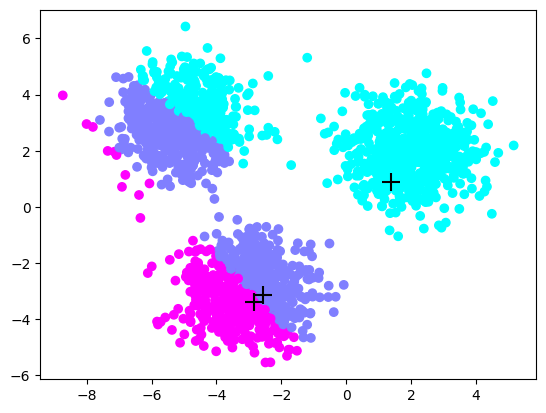

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c = z, cmap='cool')
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker = '+', s = 150, color = 'black')
plt.show()

## Problem 6
Write a function `compute_cluster_centers(X, z, k)` that computes the clusters' centers as per z and returns `k` new cluster centers.

In [ ]:
def compute_cluster_centers(X, z, k):
  cluster_centers = np.array([np.mean(X[z==i], axis=0) for i in range(k)])
  return cluster_centers

## Convergence

Keep executing the code in problems 4, 5 and 6 (for, say, 10 iterations) to observe how the clusters change across different iterations.

After around 5-6 iterations, the cluster centers will stabilize. We'll be able to see $k$ distinct clusters, quite clearly.

## Solution

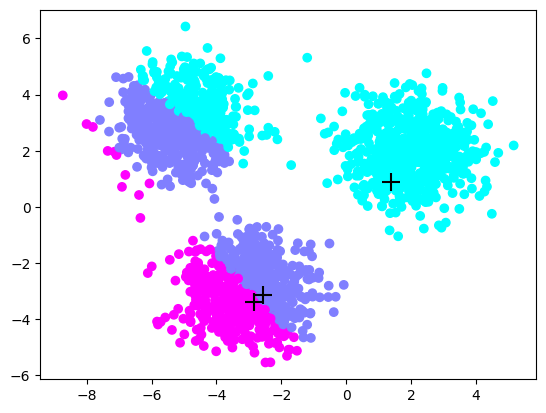

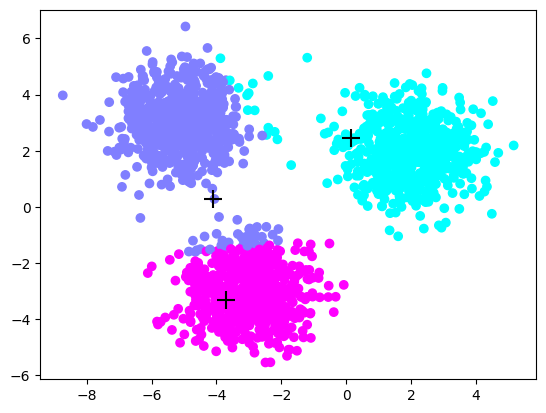

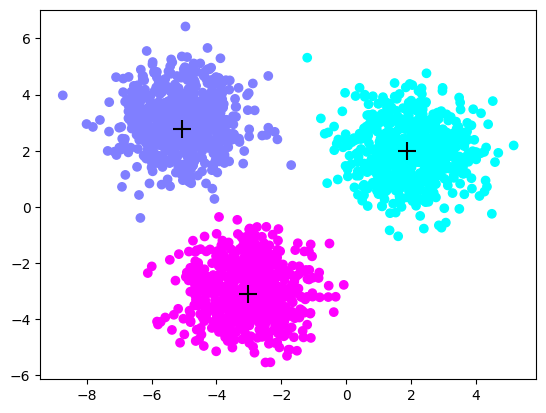

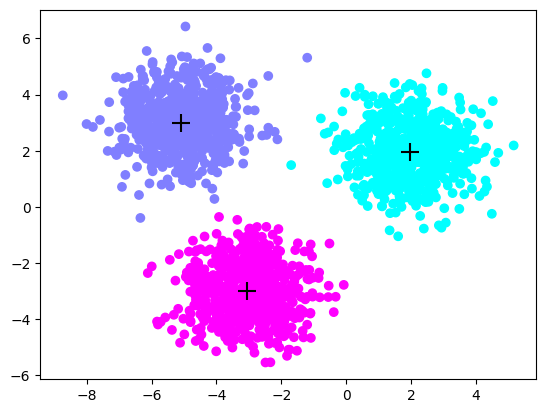

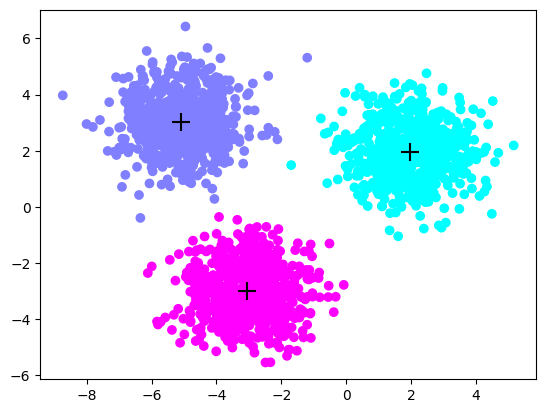

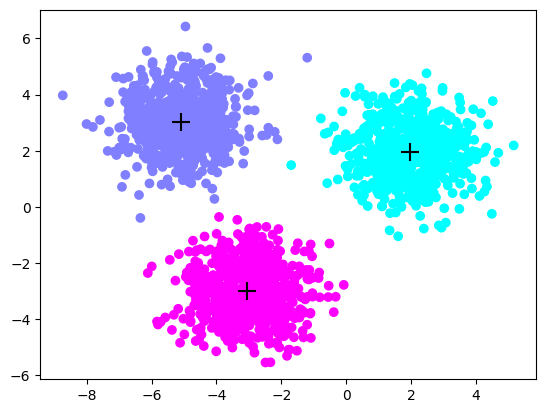

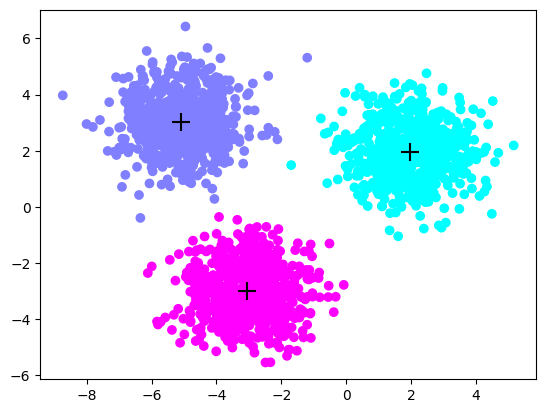

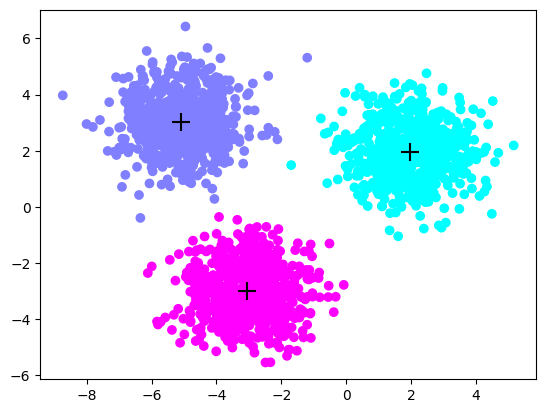

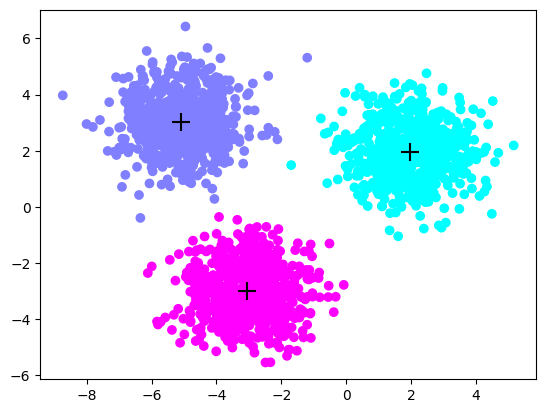

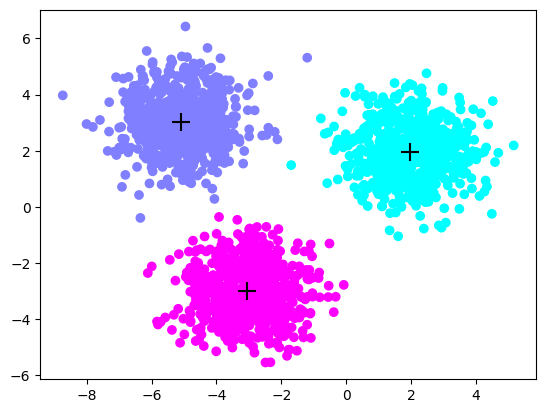

In [ ]:
for i in range(10):
  z = assign_clusters(X, k, cluster_centers) # assigning cluster-labels
  plt.scatter(X[:, 0], X[:, 1], c = z, cmap = 'cool') # plotting the datapoints with colors corresponding to cluster-labels
  plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker = '+', s = 150, color = 'black') # cluster centers
  cluster_centers = compute_cluster_centers(X, z, k) # recomputing cluster-centers to repeat the process
  plt.show()

<hr width='100%'>

## Extra

Let's define the objective function (also called "quality function"). Our aim is to minimize the value of this objective function.

In [ ]:
def objective_function(X, cluster_centers):
  obj_val = 0
  for i in range(len(X)):

    distances_between_clusters = []

    for cluster in cluster_centers:
      dist = np.linalg.norm(X[i] - cluster)**2
      distances_between_clusters.append(dist)

    obj_val += min(distances_between_clusters)

  return obj_val

### Voronoi Diagram
Here we are re-initializing the variable `cluster_centers` to start afresh.

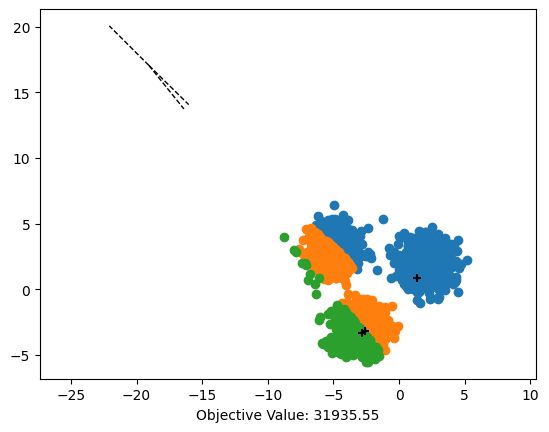

In [ ]:
# Random Initialization
from scipy.spatial import Voronoi, voronoi_plot_2d

np.random.seed(12)

k = 3

cluster_centers = cluster_centers = np.array([X[200],X[800],X[1200]])

z = assign_clusters(X, k, cluster_centers)

ax = plt.axes()

for c in range(k):
  ax.scatter(X[:, 0][z==c], X[:, 1][z==c])
  # Plot all points in X whose cluster-label is `c`

ax.scatter(cluster_centers[:, 0], cluster_centers[:, 1], color='black', marker='+');

vor =  Voronoi(cluster_centers)
voronoi_plot_2d(vor, ax=ax, show_points=False, show_vertices=False)

ax.axis('equal');
ax.set_xlabel(f'Objective Value: {round(objective_function(X, cluster_centers), 2)}');

Now let's re-plot the graphs for 10 iterations along with the value of the objective function for each iteration. The objective function value stabilizes at `3845.5`, which is the function's minimum value.

Objective function value: 31935.546373933084 




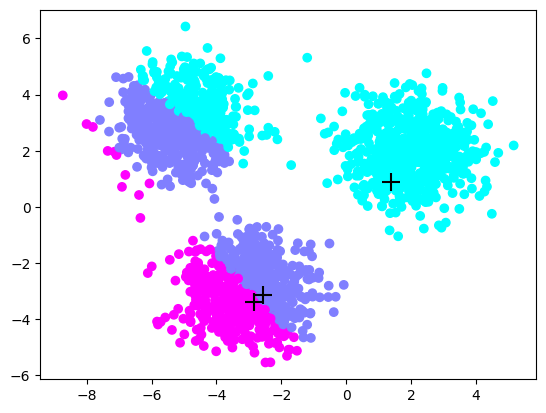

Objective function value: 12128.214479755969 




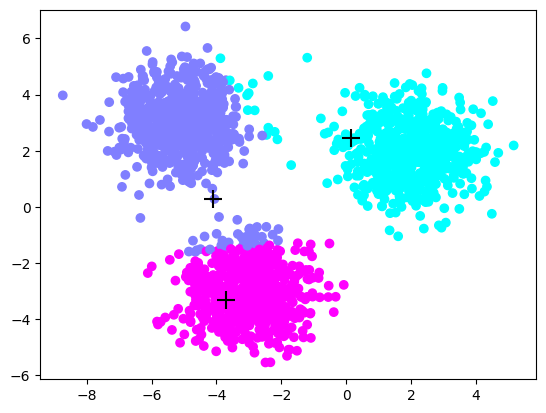

Objective function value: 3894.8155332495744 




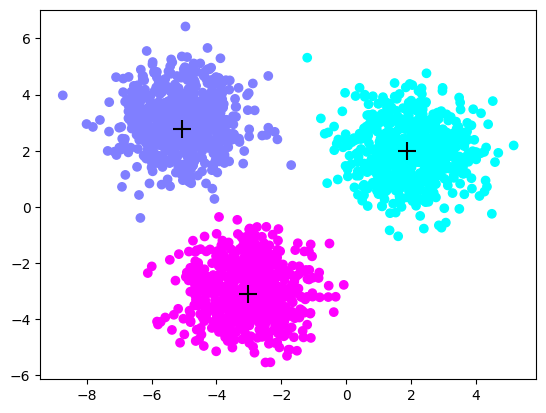

Objective function value: 3845.545786426678 




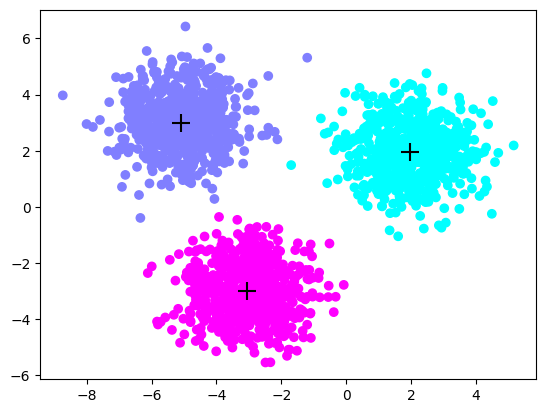

Objective function value: 3845.501105942226 




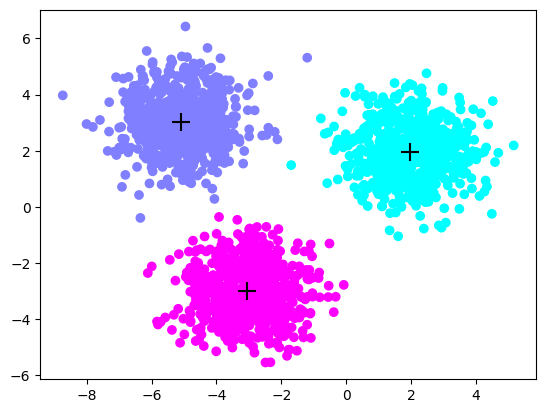

Objective function value: 3845.501105942226 




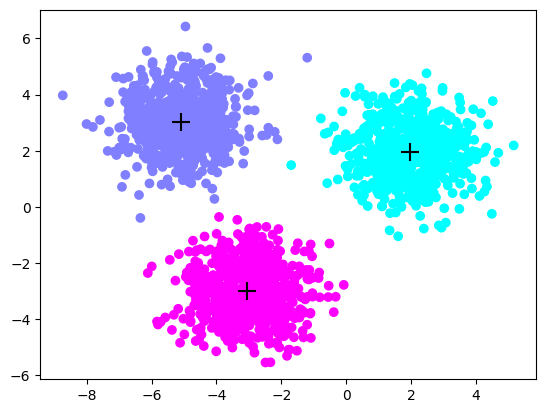

Objective function value: 3845.501105942226 




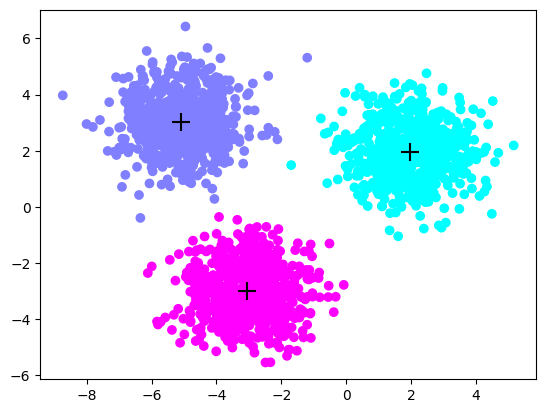

Objective function value: 3845.501105942226 




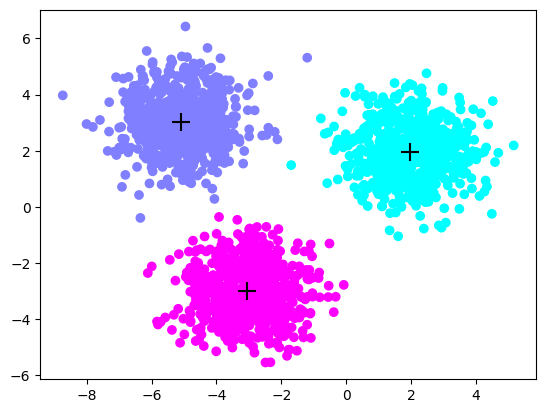

Objective function value: 3845.501105942226 




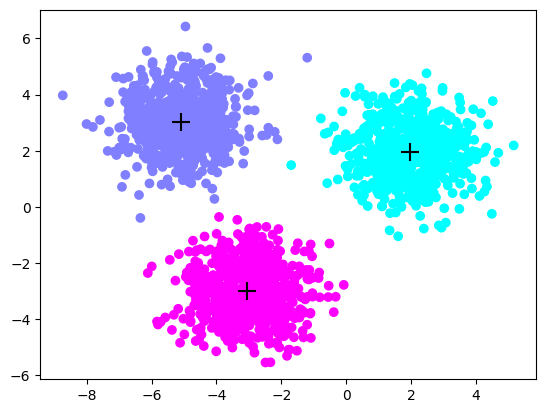

Objective function value: 3845.501105942226 




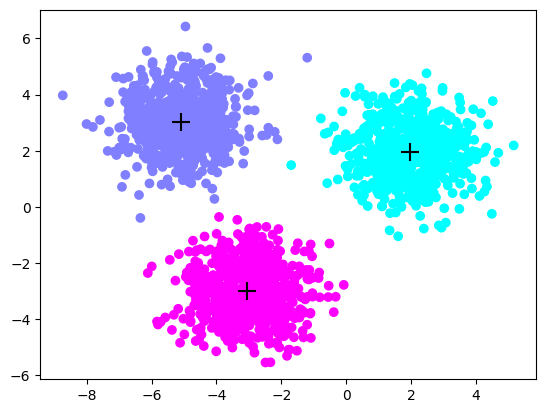

In [ ]:
for i in range(10):
  z = assign_clusters(X, k, cluster_centers) # assigning cluster-labels
  plt.scatter(X[:, 0], X[:, 1], c = z, cmap = 'cool') # plotting the datapoints with colors corresponding to cluster-labels
  plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], marker = '+', s = 150, color = 'black') # cluster centers
  print("Objective function value:", objective_function(X, cluster_centers),"\n\n")
  cluster_centers = compute_cluster_centers(X, z, k) # recomputing cluster-centers to repeat the process
  plt.show()